In [26]:
import numpy as np
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Estatística - Amostragem

Quando se prepara um macarrão, uma unidade desse é retirada para saber se o ponto de cozimento é o desejado.

Pra saber se uma sopa está corretamente salgada, experimentamos uma única colherada.

Quando um médico deseja identificar se um paciente está doente, alguns ml de sangue são retirados para análise. 

Em todos os casos acima, não seria conveniente analisar o todo, para chegar a uma conclusão satisfatória. De fato, o que fazemos é **tirar uma parte do todo** para validar alguma suposição.

Este procedimento é chamado de **amostragem**, e tem como objetivo **obter informações, tirar conclusões sobre o todo** com base na **análise de dados coletados de parte do todo (amostra)**.

A **inferência estatística** é a área que define:

- Como coletar as amostras do todo a serem analisadas;
- Como, e com que confiança, podemos generalizar as conclusões para o todo.

<img src="https://phhp-faculty-cantrell.sites.medinfo.ufl.edu/files/2012/07/mod10-big_picture_inference.gif" width="600">

## Definições

**População** ou **Universo**: é o conjunto de todas as unidades elementares de interesse: o todo. A população sempre deve ser definida claramente e em termos da informação que se pretende conhecer;

**Unidade**: trata-se de qualquer elemento da populaçao;

**Amostra**: uma parte ou subconjunto da população;

**Parâmetro Populacional**: é o vetor correspondente a todos os valores de uma variável de interesse. Pode ser qualitativa (gosto musical, opnião sobre o governo, etc) ou quantitativa (média, proporção, quantidade, etc).

**Estimadores pontuais**: são valores que **estimam** os parâmetros populacionais, calculados com base em uma amostra.
<br>

- Exemplos de parâmetros populacionais: 
    - média: $\mu$
    - diferença de médias: $\mu_1 - \mu_2$
    - proporção: $p$
    - diferença de proporções: $p1 - p2$
    
- Exemplos de estimadores de ponto: 
    - média: $\bar{x}$
    - diferença de médias: $\bar{x}_1 - \bar{x}_2$
    - proporção: $\hat{p}$
    - diferença de proporções: $\hat{p}_1 - \hat{p}_2$

## Tipos de Amostragem

- **Amostra probabilística**: todos os elementos da população apresentam probabilidade maior que zero de serem selecionados


- **Amostra não probabilística**: quando não há probabilidade clara/conhecida de seleção dos elementos. Os elementos são escolhidos de forma julgamental.

Aqui, abordaremos apenas os métodos relacionados à **amostragem probabilística**, com o objetico de obter uma **amostra representativa**. 

Uma amostra é considerada representativa quando consegue **refletir as caracteristicas da população**.

Vamos ver os principais **métodos de amostragem**:

## Amostra Aleatória Simples

Este é o método mais simples e mais importante de seleção de uma amostra, pois pode ser usada em combinação com outros métodos. A premissa assumida é que a população é homogênea com relação à característica de interesse.

A amostra aleatória simples pode ser realizada com ou sem reposição. No caso em que há reposição, cada elemento pode ser sorteado mais de uma vez. Para exemplificar, suponha que se queira sortear um número aleatório de uma urna, se for uma Amostra Aleatória Simples com preposição,  este número voltará para urna para participar do próximo sorteio. Se não houver reposição, cada elemento só poderá ser selecionado uma vez para compor a amostra.
 
Considere uma população formada por $N$ elementos (conhecido e finito). Este método consiste em selecionar $n$ elementos, sendo que cada elemento tem a mesma probabilidade de ser selecionado.

**Exemplo**: Considere uma população formada por 20 alunos. Selecionar de forma aleatória 5 alunos, **sem reposição**.

In [2]:
import random

random.seed(7)
pop = list(range(20))
print("População: ", pop, "\n")

População:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 



In [28]:
#amostra
random.sample(pop, 5)

[13, 11, 12, 7, 4]

## Amostra Estratificada

Trata-se do método em que a população é dividida em grupos (estratos) segundo alguma(s) característica(s) conhecida(s) na população sob estudo. 

São exemplos de estrato: gênero, faixa etária, região geográfica, profissão, etc. 

No geral, é usada quanto a população é heterogênea sob a ótica das características analisadas. 

Procedimento de amostragem:

- Dividir as $ N $ unidades da população em $N_1, N_2, \cdots , N_j$ estratos distintos e homogêneos


- Selecionar, ao acaso, uma amostra de tamanhos $n_1, n_2, \cdots , n_j$ , de modo que o tamanho da amostra seja $n = n_1+n_2+ \cdots +n_j$. O tamanho amostral pode ser proporcional à representatividade do estrato


**Exemplo**: Considere a população formada pelos integrantes de uma escola. Dependendo do objetivo do estudo, esta população poderia ser dividida em alunos, professores, e demais funcionários (grupos mais homogêneos com relação à função na escola). 

Agora considere que a proporção de cada estrato seja: 50% alunos, 25% professores e 25% servidores. A amostragem poderia ser realizada dentro de cada estrato de forma que o tamanho amostral preserve esta característica. Sendo assim, se amostra total é $n$, a composição será $0,5 \times n$ de alunos, $0,25\times n$ de professores e $0,25\times n$ de servidores.

<img src="https://faculty.elgin.edu/dkernler/statistics/ch01/images/strata-sample.gif" width=400>


In [2]:
tamanho_amostra = 50

print("Tamanho da amostra de professores:", 0.25*tamanho_amostra)
print("Tamanho da amostra de alunos:", 0.5*tamanho_amostra)
print("Tamanho da amostra de servidores:", 0.25*tamanho_amostra)

Tamanho da amostra de professores: 12.5
Tamanho da amostra de alunos: 25.0
Tamanho da amostra de servidores: 12.5


In [30]:
#mpg
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [32]:
#sample size
mpg.origin.value_counts(normalize=True)

usa       0.625628
japan     0.198492
europe    0.175879
Name: origin, dtype: float64

In [33]:
#sample n
mpg.groupby("origin").sample(n=2, random_state=7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
119,20.0,4,114.0,91.0,2582,14.0,73,europe,audi 100ls
21,24.0,4,107.0,90.0,2430,14.5,70,europe,audi 100 ls
108,20.0,4,97.0,88.0,2279,19.0,73,japan,toyota carina
181,33.0,4,91.0,53.0,1795,17.5,75,japan,honda civic cvcc
386,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited
15,22.0,6,198.0,95.0,2833,15.5,70,usa,plymouth duster


In [34]:
#sample frac
mpg.groupby("origin").sample(frac=0.5, random_state=7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
119,20.0,4,114.0,91.0,2582,14.0,73,europe,audi 100ls
21,24.0,4,107.0,90.0,2430,14.5,70,europe,audi 100 ls
299,27.2,4,141.0,71.0,3190,24.8,79,europe,peugeot 504
172,25.0,4,90.0,71.0,2223,16.5,75,europe,volkswagen dasher
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel
...,...,...,...,...,...,...,...,...,...
12,15.0,8,400.0,150.0,3761,9.5,70,usa,chevrolet monte carlo
306,28.8,6,173.0,115.0,2595,11.3,79,usa,chevrolet citation
70,13.0,8,400.0,190.0,4422,12.5,72,usa,chrysler newport royal
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)


In [36]:
#validacao
mpg.groupby("origin").sample(frac=0.5, random_state=7).origin.value_counts(normalize = True)

usa       0.623116
japan     0.201005
europe    0.175879
Name: origin, dtype: float64

In [38]:
# media amostral por grupo de origem
mpg.groupby("origin").sample(frac=0.5, random_state=7).groupby("origin").mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.797143,4.171429,110.885714,82.060606,2516.514286,17.037143,75.628571
japan,30.742500,4.150000,105.175000,80.725000,2230.650000,15.937500,77.775000
usa,20.208065,6.306452,242.596774,117.677686,3341.064516,15.338710,75.887097


In [39]:
# media populaciona por grupo de origem
mpg.groupby("origin").mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442


<font color = red>**metodos de amostragem são muito utilizados em ML quando temos dados distribuidos em classes desbalanceadas**</font>

## Bootstraping

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
#n = 60
np.random.seed(7)

pop = np.random.choice(range(-5,6),p=[0.05,0.05,0.1,0.1,0.1,0,0,0,0.2,0.2,0.2],size=60)
grupos = np.concatenate((np.ones(30),np.ones(30)*2))

In [4]:
pop_dict = {"pop":pop,
            "grupo": grupos}
data = pd.DataFrame(pop_dict)
data["remedio"] = np.where(data.grupo > 0, "melhorou", "piorou")
data

,pop,grupo,remedio
0,-4,1.0,melhorou
1,4,1.0,melhorou
2,3,1.0,melhorou
3,4,1.0,melhorou
4,5,1.0,melhorou
5,3,1.0,melhorou
6,3,1.0,melhorou
7,-4,1.0,melhorou
8,-2,1.0,melhorou
9,3,1.0,melhorou


<AxesSubplot:xlabel='pop', ylabel='count'>

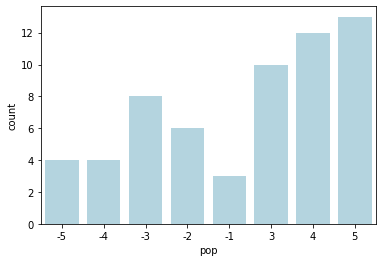

In [102]:
sns.countplot(data = data, x = "pop", color="lightblue")

In [11]:
data["pop"].mean()

1.65

<AxesSubplot:ylabel='Count'>

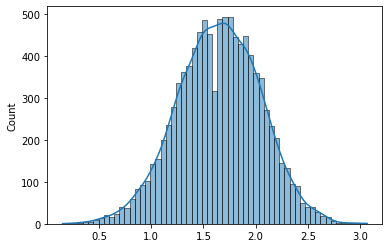

In [7]:
repeticoes = 10_000
n = 60
np.random.seed(7)
amostras = np.random.choice(pop, size = n*repeticoes).reshape((repeticoes,n))
amostras_medias = amostras.mean(axis = 1)
sns.histplot(amostras_medias,kde = True)

In [8]:
amostras_medias.mean()

1.646636666666667

In [9]:
print(np.quantile(amostras_medias, 0.975))
print(np.quantile(amostras_medias, 0.025))

2.4
0.85


In [10]:
print(np.quantile(amostras_medias, 0.995))
print(np.quantile(amostras_medias, 0.005))

2.616749999999987
0.5833333333333334


<AxesSubplot:ylabel='Count'>

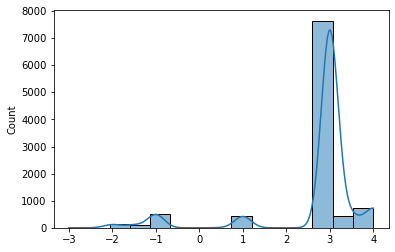

In [120]:
amostras_medianas = np.median(amostras, axis = 1)
sns.histplot(amostras_medianas,kde = True)

<AxesSubplot:ylabel='Count'>

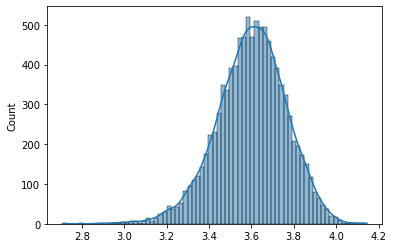

In [121]:
amostras_std = np.std(amostras, axis = 1)
sns.histplot(amostras_std,kde = True)

# Teste de Hipótese

São testes realizados para verificar uma hipótese acerca de um parâmetro populacional $\theta$ de uma determinada v.a. $X$. Por exemplo, afirmamos que o verdadeiro valor de $\theta$, estimado por $\hat{\theta}$, é igual a $\theta_0$. Para tanto, colhe-se uma amostra aleatória de elementos dessa população, e com ela deseja-se comprovar ou não tal hipótese.

A hipótese que estamos colocando à prova e a chamamos de **hipótese nula**, e escrevemos

$$H_0: \theta = \theta_0$$

Em seguida, convém explicitar também a hipótese $H_1$ que será considerada como **alternativa**, caso $H_0$ seja rejeitada. Por exemplo,

$$H_1: \theta \neq \theta_0$$

Note que poderíamos ter outras tantas opções de alternativa, como

$$H_1: \theta < \theta_0$$
$$H_1: \theta > \theta_0$$

Por este motivo **nós apenas rejeitamos $H_0$ ou não temos confiança para rejeitar $H_0$**. Nunca dizemos **aceitar $H_1$** pois existem várias outras alternativas a serem testadas para saber se nós aceitamos a alternativa correta de fato.

Qualquer que seja a decisão tomada estamos sujeitos a cometer erros. Para facilitar a linguagem, introduzimos as definições:

- **Erro de tipo I (falso positivo):** rejeitar a hipótese nula quando essa é verdadeira. Chamamos de $\alpha$ a probabilidade de cometer esse erro, isto é

$$\alpha = P(\text{Erro tipo 1}) = P(\text{Rejeitar} H_0|H_0 \text{é verdadeira}) $$

- **Erro de tipo II (falso negativo):** não rejeitar a hipótese nula quando ela é falsa. Sendo $\beta$ a probabilidade de cometer esse erro, ou seja

$$\beta = P(\text{Erro tipo 2}) = P(\text{não Rejeitar} H_0|H_0 \text{é falsa}) $$

Operacionalmente, essa decisão é tomada através da consideração de uma região crítica RC de forma que $\alpha = P(\hat{\theta} \in RC| H_0)$ 

$\alpha$, constuma ser um valor arbitrário, comumente 0.1%, 1% ou 5%, que determina o **nível de significância** do nosso teste. De forma equivalente $1-\alpha$ é a nossa confiança.

### Ex.:

Uma máquina automática para encher pacotes de café enche-os segundo uma distribuição normal, com média μ e variância sempre igual a 400 $g^2$. A máquina foi regulada para μ = 500 g. Desejamos, periodicamente, colher uma amostra de 16 pacotes e verificar se a produção está sob controle, isto é, se μ = 500 g ou não. Se uma dessas amostras apresentasse uma média $\overline{X} = 492$ g, você pararia ou não a produção para regular a máquina?

X o peso de cada pacote, então $X \sim N(500, 400)$ e 

$$H_0: \mu = 500$$
$$H_1: \mu \neq 500$$

Nesse caso,

- **Erro de tipo I:** dizer que a média é diferente de 500g quando na verdade não é. 

Queremos encontrar a RC tal que

$$P(erro I) = P(\overline{X} \in RC|H_0) = \alpha$$


Pelo TLC $\overline{X} \sim N(500, 25)$ e assumindo H0

Vamos fixar α = 1%. Pela hipótese alternativa, vemos que H0 deve ser rejeitada quando a média for muito pequena ou muito grande conforme a figura abaixo

<img src = "../imgs/rc_cafe.png" width = "50%"></img>


$$P(\overline{X} \in RC|H_0) = 0.01 \rightarrow P(|\overline{X}| \leq x_c) = P(\dfrac{x_{c_1} - 500}{5} \leq \dfrac{\overline{X} - 500}{5} \leq \dfrac{x_{c_2} - 500}{5}) = P(-z \leq Z \leq z)$$

de forma que:

$$z = \dfrac{x_{c_2} - 500}{5} = ... $$

Para acharmos os valores da região crítica podemos olhar na tabela da distribuição normal padrão ou ...

In [55]:
#ppf
alpha = 0.01
rv = stats.norm(0,1)
z_sup = rv.ppf(1-(alpha/2)) #P(X <= 99.5)
z_sup

2.5758293035489004

In [44]:
rv.cdf(2.57) # P(X <= 2.57)

0.994915074251009

In [45]:
rv.ppf(0.995)

2.5758293035489004

In [46]:
rv.cdf(1)

0.8413447460685429

In [48]:
rv.ppf(0.8413447460685429)

1.0

$$z = \dfrac{x_{c_2} - 500}{5} \approx 2.57 \rightarrow x_{c_2} \approx 2.57*5 + 500 \approx 512.9$$

In [54]:
#normal mu, sigma
mu = 500
std = 5

In [57]:
#xc
xc_sup_real = z_sup*std + mu
xc_sup_real

512.8791465177445

In [59]:
rv = stats.norm(mu, std) # mu = 500 e std = 5
(rv.ppf(0.005), rv.ppf(0.995))

(487.1208534822555, 512.8791465177445)

Portanto 

$$RC = \{\overline{X} \in \mathbb{R} | \overline{X} \leq 487.1 \text{ ou }  \overline{X} \geq 512.9\}$$

Como $\overline{X}$ não pertence à região crítica, não temos evidências para rejeitar $H_0$. Ou seja, o desvio da média da amostra para a média proposta por $H_0$ pode ser considerado como devido apenas ao sorteio aleatório dos pacotes.

### Forma alternativa de verificação

Sob H0:

$$\dfrac{\overline{X} - 500}{5} = \dfrac{492 - 500}{5} = -1.6  \rightarrow -2.57 < -1.6 < 2.57$$

ou seja, o valor está dentro do limite aceitado

### Com dados

In [60]:
#simulacao
np.random.seed(7)
amostra_cafe = np.random.normal(492, 5, 100)
print(amostra_cafe[1:50])
amostra_cafe.mean()

[489.67031315 492.16410082 494.03758141 488.05538486 492.01032786
 491.99554807 483.22637847 497.08829003 495.00249258 488.87285513
 491.14225869 494.52649687 490.69321792 490.78625461 484.73379294
 494.77290156 492.61940453 493.37229962 484.36737734 500.25349846
 492.77167768 490.06430028 502.1453611  491.77306985 484.7466065
 489.97386072 480.55842449 497.24698275 489.91762841 488.28723237
 497.36235066 483.74462205 494.67714678 481.67792598 488.6892033
 485.97890077 499.30987814 500.83080439 490.35293124 496.20366621
 491.10006799 494.84030944 488.23581402 483.45830398 482.98450671
 493.91560926 503.23797526 493.34705815 489.3769769 ]


492.0603271225887

In [165]:
#test
media_pop = 500
t_value, p_value = stats.ttest_1samp(amostra_cafe, media_pop, alternative="two-sided")
(t_value, p_value)

(-15.509115746070092, 3.0299217642595494e-28)


<img src = "../imgs/meme_pvalor.jpg" width = "50%"></img>



# VOLTAMOS 20:55

### Ex.:

Uma indústria usa, como um dos componentes das máquinas que produz, um parafuso importado, que deve satisfazer a algumas exigências. Uma dessas é a resistência à tração. Esses parafusos são fabricados por alguns países, e as especificações técnicas variam de país para país. Por exemplo, o catálogo do país A afirma que a resistência média à tração de seus parafusos é de 145 kg, com desvio padrão de 12 kg. Já para o país B, a média é de 155 kg e desvio padrão 20 kg.

Um lote desses parafusos, de origem desconhecida, será leiloado a um preço muito convidativo. Para que a indústria saiba se faz ou não uma oferta, ela necessita saber qual país produziu tais parafusos. O edital do leiloeiro afirma que, pouco antes do leilão, será divulgada a resistência média⎯x de uma amostra de 25 parafusos do lote. Qual regra de decisão deve ser usada pela indústria para dizer se os parafusos são do país A ou B?


Uma resposta que ocorre imediatamente é a que considera como país produtor aquele para o qual a média da amostra mais se aproximar da média da população. Assim, uma possível regra de decisão seria:

- H0: os parafusos são de origem B. Isso equivale a dizer que a resistência X de cada parafuso segue uma distribuição com média μ = 155 e desvio padrão σ = 20.
- H1: os parafusos não são de B, e portanto μ < 155.

Nesse caso,

- **Erro de tipo I:** dizer que os parafusos não são de B quando na realidade são. Isso ocorre quando uma amostra de 25 parafusos de B apresenta média menor do de 155 kg. 

Queremos encontrar a RC tal que

$$P(erro I) = P(\overline{X} \in RC|H_0) = \alpha$$

mas, quando H0 é verdadeira, pelo TLC $\overline{X} \sim N(155, 16)$ e fixando $\alpha = 0.05$

$$P(\overline{X} \in RC|H_0) = 0.05 \rightarrow P(\overline{X} \leq k) = P(\dfrac{\overline{X} - 155}{4} \leq \dfrac{k - 155}{4}) = P(Z \leq z) = ...$$

In [13]:
#z

$$P(Z \leq -1.645) \rightarrow -1.645 = z  \rightarrow -1.645 = \dfrac{k-155}{4} \rightarrow k = 148.42$$

Dessa forma dizemos que se o valor da média $\overline{X}$ menor do que 148.42 nós podemos rejeitar H0 e portanto temos evidências para dizer que os parafusos provavelmente não são do país B com uma confiança de 95%

<img src = "../imgs/std_error.png" width = "50%"> 

## Construção geral

- Passo 0: Definir as hipóteses do problema
- Passo 1: Identificar a distribuição do parâmetro populacional $\theta$ de interesse, de forma que $E(\theta) = \mu$ e $Var(\theta) = \sigma^2$
- Passo 2: Pelo TLC o estimador pontual de $\theta$ segue uma distribuição normal da seguinte forma, $\hat{\theta} \sim N\left(\mu, \dfrac{\sigma^2}{n}\right)$
- Passo 3: Definir um valor de $\alpha$
- Passo 4: Encontrar o valor de $z$ que satisfaça $P(-z \leq Z \leq z|H_0) = \alpha$ ou a probabilidade específica para a hipótese sendo testada
- Passo 5: Definir a região crítica RC de forma que se $\hat{\theta} \in RC$ então rejeitamos $H_0$ e fazemos alguma inferência sobre as nossas populações.

Vamos colocar o passo a passo a prova com mais um exemplo


**Ex.:** Uma estação de televisão afirma que 60% dos televisores estavam ligados no seu programa especial da última segunda-feira. Uma rede competidora deseja contestar essa afirmação e decide usar uma amostra de 200 famílias para um teste da qual 104 afirmaram estar assistindo ao programa. Qual deve ser o procedimento adotado para avaliar a veracidade da afirmação da estação?

**Passo 0:**

$$H_0: p = 0.6$$
$$H_1: p < 0.6$$

**Passo 1:**

$$\theta \sim Bernoulli(p) \rightarrow E(\theta) = p; Var(\theta) = p(1-p) $$

**Passo 2:**
$$\hat{p} \sim N\left(p, \dfrac{p(1-p)}{n}\right)$$

**Passo 3:**
$$\alpha = 0.05$$

**Passo 4:**
Assumindo $H_0$ verdadeira então

$$\hat{p} \sim N\left(0.6, \dfrac{0.24}{200}\right)$$

e portanto

$$P(\text{Erro Tipo I}) = P(\hat{p} \leq \hat{p}_c) = P\left(Z \leq \dfrac{\hat{p}_c - 0.6}{\sqrt{0.24/200}}\right) = 0.05$$

**Passo 5:**

$$\dfrac{\hat{p}_c - 0.6}{\sqrt{0.24/200}} = -1.645 \rightarrow \hat{p}_c = 0.544$$

Logo 
    
$$RC = \{\hat{p} \in [0; 1] | \hat{p} < 0.544\}$$

e como $\hat{p} = 104/200 = 0.52 \in RC$ então temos evidências para rejeitar $H_0$

## Na realidade nem tudo são flores 🥀 ...

Para todos os casos estamos assumindo que os parâmentros populacionais são todos conhecidos, sobretudo a variância populacional. Caso não conheçamos $\sigma$ e tenhamos que usar o valor amostral $S$ então a distribuição esperada para o calculo da probabilidade deixa de ser normal e passa a ser a t-Student com parâmetro $n-1$

**Ex.:** Um fabricante afirma que seus cigarros contêm não mais que 30 mg de nicotina. Uma amostra de 25 cigarros fornece média de 31,5 mg e desvio padrão de 3 mg. No nível de 5%, os dados refutam ou não a afirmação do fabricante?

$$H_0: \mu = 30$$
$$H_1: \mu > 30$$

$$X \sim N(\mu, \sigma^2)$$
$$T = \dfrac{\sqrt{25}(\overline{X}-30)}{S}\sim t(24)$$

De forma que

$$P(T > t_c) = 0.05 \rightarrow t_c = 1.711$$

In [61]:
#t
n = 25
alpha = 0.05
dof = n - 1
rv = stats.t(dof)
rv.ppf(1-alpha)

1.7108820799094275

$$RC = [1.711;\infty)$$

Sendo

$$T = \dfrac{\sqrt{25}(\overline{X}-30)}{S} = \dfrac{5(31.5-30)}{3} = 2.5$$

Rejeitamos $H_0$

## Intervalo de confiança

Seguindo esses mesmo conceitos, para termos uma magnitude do erro que estamos comentento ao determinar o estimador pontual é que definimos o intervalo de confiança, que são baseados na distribuição amostral do estimador pontual.

Supondo média e variância conhecidas, do TLC

$$ e = (\overline{X} - \mu) \sim N\left(0, \sigma^2_{\overline{X}} = \frac{\sigma^2}{n}\right)$$

Para um intervalo de confiança de 95% temos então que:

$$P(|e| < 1.96\sigma_{\overline{X}}) = 0.95$$
$$P(|\overline{X} - \mu| < 1.96\sigma_{\overline{X}}) = 0.95$$
$$P(-1.96\sigma_{\overline{X}} < \overline{X} - \mu < 1.96\sigma_{\overline{X}}) = 0.95$$
$$P(\overline{X}-1.96\sigma_{\overline{X}} < \mu < \overline{X} + 1.96\sigma_{\overline{X}}) = 0.95$$

$$IC_{\mu}(X) = (\overline{X}-1.96\sigma_{\overline{X}}, \overline{X}+1.96\sigma_{\overline{X}})$$

De forma geral construímos um intervalo da seguinte forma

$$P(|\hat{\theta} - \theta| < \epsilon) = 1-\alpha$$

sabendo que

$$e = (\hat{\theta} - \theta) \sim DistProb(\tilde{\phi})$$

## Comparação de sub-populações

In [124]:
np.random.seed(7)
pop1 = np.random.gamma(shape = 1, scale = 13, size = 30)
pop2 = np.random.gamma(shape = 1, scale = 35, size = 30)
pop = np.concatenate((pop1,pop2))
grupos = np.concatenate((np.ones(30), np.ones(30)*2))

In [125]:
pop_dict = {"pop":pop,
            "grupo": grupos}
data = pd.DataFrame(pop_dict)
data["remedio"] = np.where(data.grupo == 1, "real", "placebo")
data

,pop,grupo,remedio
0,1.031900,1.0,real
1,19.678863,1.0,real
2,7.500764,1.0,real
3,16.710441,1.0,real
4,49.611071,1.0,real
5,10.052436,1.0,real
6,9.040078,1.0,real
7,0.972122,1.0,real
8,4.063470,1.0,real
9,9.007859,1.0,real


<AxesSubplot:xlabel='remedio', ylabel='pop'>

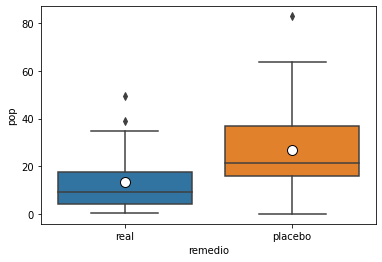

In [126]:
sns.boxplot(data = data,
            x = "remedio",
            cy = "pop",
            showmeans = True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

Observando as médias o que queremos saber então é se $\mu_X = \mu_Y$ que é equivalente a verificar se $\theta_0 = \mu_X - \mu_Y = 0$.  

Conforme vimos nos exemplos anteriores notaremos que a ideia é exatamente a mesma.

Dadas duas populações $P_1 \sim N(\mu_1, \sigma_1^2)$ e $P_2 \sim N(\mu_2, \sigma_2^2)$

Novamente formulamos H0 e H1

$$H_0: \mu_1 - \mu_2 = 0$$
$$H_1: \mu_1 - \mu_2 \neq 0$$

Dessa forma, pelo TLC

$\overline{X} \sim N(\mu_1, \frac{\sigma_1^2}{n})$ e $\overline{Y} \sim N(\mu_2, \frac{\sigma_2^2}{m})$

e portanto, sob H0 

$$\overline{X} - \overline{Y}  \sim N(0, \frac{\sigma_1^2}{n} + \frac{\sigma_2^2}{m})$$

De maneira que

$$Z = \dfrac{\overline{X} - \overline{Y}}{\sqrt{\frac{\sigma_1^2}{n} + \frac{\sigma_2^2}{m}}}  \sim N(0, 1)$$




#### Ex.: Fraturo do Úmero em Idosos
Resultados obtidos em experimentos com recuperação de idosos, que tiveram o úmero fraturado, com verificações realizadas após 6 meses de físioterapia ou da cirurgia. Deseja-se saber se os tratamentos tem a mesma efetividade.

In [34]:
dict_data = {
             "melhora":[62, 48, 110],
             "nao_melhora":[38, 52, 90],
             "total": [100, 100, 200]
            }
data = pd.DataFrame(dict_data, index = ["operacao", "fisio", "total"])
data

,melhora,nao_melhora,total
operacao,62,38,100
fisio,48,52,100
total,110,90,200


$$H_0: \theta = p_1 - p_2 = 0$$
$$H_1: \theta = p_1 - p_2 \neq 0$$

Assumindo H0 então

$$\hat{\theta} \sim N(0, p(1-p)(\frac{1}{n}+\frac{1}{m}))$$

e

$$Z = \dfrac{\hat{\theta}}{SE(\hat{\theta})} = \dfrac{\hat{\theta}}{\sqrt{p(1-p)(\frac{1}{n}+\frac{1}{m})}} \sim N(0, 1)$$

consideranto $\alpha = 5\%$ então $z = 1.96$

In [31]:
-stats.norm().ppf(0.025)

1.9599639845400545

portanto o valor crítico obtido por

$$\dfrac{\hat{\theta}}{\sqrt{p(1-p)(\frac{1}{n}+\frac{1}{m})}}$$

considerando

- $\hat{\theta} = p_1 - p_2 = 0.62 - 0.48 = 0.14$
- $p = 110/200 = 0.55$
- $n = m = 100$

temos que

$$\dfrac{\hat{\theta}}{\sqrt{p(1-p)(\frac{1}{n}+\frac{1}{m})}} = 1.99 >1.96 $$

E assim rejeitamos H0

In [38]:
data["prob"] =  data.melhora/data.total
data

,melhora,nao_melhora,total,prob
operacao,62,38,100,0.62
fisio,48,52,100,0.48
total,110,90,200,0.55


In [41]:
#estatistica direta
theta = (data.loc["operacao","prob"] - data.loc["fisio","prob"])
p = data.loc["total","prob"]
total = (1/data.loc["operacao","total"]) + (1/data.loc["fisio","total"])

theta/math.sqrt(p*(1-p)*(total))

1.9898733526523642

In [42]:
#regiao critica
1.96*math.sqrt(p*(1-p)*total)

0.13789822333880883

In [49]:
#p-value
2*stats.norm().cdf(-1.99)

0.04659093550042364

$$IC(\hat{\theta}) = \hat{\theta} \pm SE(\hat{\theta})z_{1-\frac{\alpha}{2}}$$

In [57]:
# Intervalo de confianca
n = data.loc["operacao","total"]
m = data.loc["fisio","total"]
p1 = data.loc["operacao","prob"]
p2 = data.loc["fisio","prob"]
std_error = math.sqrt((p1*(1-p1)/n) + (p2*(1-p2)/m)) 
confianca = 0.95
alpha = 1-confianca

((p1-p2) - std_error*stats.norm().ppf(1-alpha/2), (p1-p2) + std_error*stats.norm().ppf(1-alpha/2))

(0.0034761625282679898, 0.27652383747173204)

## Python aplicado

In [15]:
#load data

In [16]:
# plot

In [17]:
# media real

In [18]:
#Uma amostra

In [19]:
#Diferenca de medias

# ANOVA - Analise de Variância
Verifica a soma de quadrados das distâncias com relação a média, dentro e fora dos grupos, para determinar diferenças estatísticas em diferentes grupos.

In [182]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#H0: medias sao iguais
#H1: ao menos duas sao diferentes

mod = ols('petal_length ~ species', data=dt_iris).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq     df            F        PR(>F)
species   437.1028    2.0  1180.161182  2.856777e-91
Residual   27.2226  147.0          NaN           NaN


In [10]:
pair_t = mod.t_test_pairwise('species')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
versicolor-setosa,2.798,0.086067,32.509597,5.254587e-69,2.627912,2.968088,0.0,True
virginica-setosa,4.090,0.086067,47.521176,4.106139e-91,3.919912,4.260088,0.0,True
virginica-versicolor,1.292,0.086067,15.011579,1.810597e-31,1.121912,1.462088,0.0,True


# Test chi-quadrado
Teste de hipótese também podem ser aplicados para verificar independência entre variáveis, tal como variáveis qualitativas que formam uma tabela de contingência. Por exmeplo.

In [7]:
dict_cooperativa = {"consumidor": [214, 51, 111],
                    "produtor": [237, 102, 304],
                    "escola": [78, 126, 139],
                    "outras": [119, 22, 48]
                   }
dt_coop = pd.DataFrame(dict_cooperativa, index = ["SP", "PR", "RS"])
dt_coop["total"] = dt_coop.sum(axis = 1)
idx_total = dt_coop.sum(axis = 0)
idx_total.name = "total"
dt_coop = dt_coop.append(idx_total)

dt_coop_prop = dt_coop.div(dt_coop.total, axis = 0)
dt_coop_prop.columns = "prop_" + dt_coop_prop.columns
dt_coop_geral = pd.concat((dt_coop, dt_coop_prop), axis = 1)
dt_coop_geral

,consumidor,produtor,escola,outras,total,prop_consumidor,prop_produtor,prop_escola,prop_outras,prop_total
SP,214,237,78,119,648,0.330247,0.365741,0.120370,0.183642,1.0
PR,51,102,126,22,301,0.169435,0.338870,0.418605,0.073090,1.0
RS,111,304,139,48,602,0.184385,0.504983,0.230897,0.079734,1.0
total,376,643,343,189,1551,0.242424,0.414571,0.221148,0.121857,1.0


In [8]:
grid = pd.DataFrame(dt_coop_prop.loc["total"]).merge(pd.DataFrame(dt_coop.total), how = "cross")
grid["esperado"] = round(grid.total_x*grid.total_y, 0)
dt_esperado = pd.DataFrame(np.reshape(np.array(grid.esperado),(5,4)).T,
                 columns=dt_coop.columns,
                 index = dt_coop.index)
dt_esperado_prop = dt_esperado.div(dt_esperado.total, axis = 0)
dt_esperado_prop.columns = "prop_" + dt_esperado_prop.columns
dt_esperado_geral = pd.concat((dt_esperado, dt_esperado_prop), axis = 1)
dt_esperado_geral

,consumidor,produtor,escola,outras,total,prop_consumidor,prop_produtor,prop_escola,prop_outras,prop_total
SP,157.0,269.0,143.0,79.0,648.0,0.242284,0.415123,0.220679,0.121914,1.0
PR,73.0,125.0,67.0,37.0,301.0,0.242525,0.415282,0.222591,0.122924,1.0
RS,146.0,250.0,133.0,73.0,602.0,0.242525,0.415282,0.220930,0.121262,1.0
total,376.0,643.0,343.0,189.0,1551.0,0.242424,0.414571,0.221148,0.121857,1.0


In [9]:
dt_coop_geral

,consumidor,produtor,escola,outras,total,prop_consumidor,prop_produtor,prop_escola,prop_outras,prop_total
SP,214,237,78,119,648,0.330247,0.365741,0.120370,0.183642,1.0
PR,51,102,126,22,301,0.169435,0.338870,0.418605,0.073090,1.0
RS,111,304,139,48,602,0.184385,0.504983,0.230897,0.079734,1.0
total,376,643,343,189,1551,0.242424,0.414571,0.221148,0.121857,1.0


In [10]:
dt_dif = dt_coop - dt_esperado
dt_dif

,consumidor,produtor,escola,outras,total
SP,57.0,-32.0,-65.0,40.0,0.0
PR,-22.0,-23.0,59.0,-15.0,0.0
RS,-35.0,54.0,6.0,-25.0,0.0
total,0.0,0.0,0.0,0.0,0.0


A partir de uma tabela de dupla entrada é possível calcular a estística

$$\theta = \sum\dfrac{(o_{ij} - e_{ij})^2}{e_{ij}}$$

tal que 

$$\theta \sim \chi^2((n-1)(m-1))$$

sendo $n$ e $m$ a quantidade de classes nas linhas e colunas respectivamente



In [138]:
dt_dif_relativo = dt_dif**2/dt_esperado
dt_dif_relativo.to_numpy().sum()
#valores muito altos indicam associacao

172.0847515023836

### Diretamente

In [7]:
dict_cooperativa = {"consumidor": [214, 51, 111],
                    "produtor": [237, 102, 304],
                    "escola": [78, 126, 139],
                    "outras": [119, 22, 48]
                   }
dt = pd.DataFrame(dict_cooperativa, index = ["SP", "PR", "RS"])
dt

,consumidor,produtor,escola,outras
SP,214,237,78,119
PR,51,102,126,22
RS,111,304,139,48


In [8]:
#h0: as amostras sao independentes
#h1: nao sao 
chi, p_value, dof, esperado = stats.chi2_contingency(dt)
chi, p_value, dof, esperado

(173.37872828220557,
 8.633916331644704e-35,
 6,
 array([[157.09090909, 268.64216634, 143.30367505,  78.96324952],
        [ 72.96969697, 124.78594455,  66.56544165,  36.67891683],
        [145.93939394, 249.5718891 , 133.1308833 ,  73.35783366]]))

## Fontes

https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/

<img src = "https://m.media-amazon.com/images/I/41yxLjUEsPL.jpg" width = "25%"></img>